In [1]:
!curl -O 'https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/fbb_matplotlibrc.json'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
104   524  104   524    0     0   3087      0 --:--:-- --:--:-- --:--:-- 13100


In [2]:
!curl -O 'https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/HW4_fb55/getCitiBikeCSV.py'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
103  2282  103  2282    0     0  15763      0 --:--:-- --:--:-- --:--:--  202k


In [3]:
from __future__ import print_function, division
import numpy as np
import pylab as pl
import pandas as pd
import os
import json
s = json.load( open("/wingrdp/homedirs/skk456/PUI2016_skk456/HW5_skk456/fbb_matplotlibrc.json") )
pl.rcParams.update(s)
from scipy.stats import norm
from scipy.stats import ks_2samp
from getCitiBikeCSV import getCitiBikeCSV
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
np.random.seed(99)
%pylab inline

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
datestring = '201507'
getCitiBikeCSV(datestring)

('Downloading', '201507')
file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1


In [8]:
year1 = datestring[:4]
year1

'2015'

In [10]:
df['age'] = int(year1) - df['birth year'][(df['usertype'] == 'Subscriber')]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,732,7/1/2015 00:00:03,7/1/2015 00:12:16,489,10 Ave & W 28 St,40.750664,-74.001768,368,Carmine St & 6 Ave,40.730386,-74.002150,18669,Subscriber,1970.0,1,45.0
1,322,7/1/2015 00:00:06,7/1/2015 00:05:29,304,Broadway & Battery Pl,40.704633,-74.013617,3002,South End Ave & Liberty St,40.711512,-74.015756,14618,Subscriber,1984.0,1,31.0
2,790,7/1/2015 00:00:17,7/1/2015 00:13:28,447,8 Ave & W 52 St,40.763707,-73.985162,358,Christopher St & Greenwich St,40.732916,-74.007114,18801,Subscriber,1992.0,1,23.0
3,1228,7/1/2015 00:00:23,7/1/2015 00:20:51,490,8 Ave & W 33 St,40.751551,-73.993934,250,Lafayette St & Jersey St,40.724561,-73.995653,19137,Subscriber,1990.0,1,25.0
4,1383,7/1/2015 00:00:44,7/1/2015 00:23:48,327,Vesey Pl & River Terrace,40.715338,-74.016584,72,W 52 St & 11 Ave,40.767272,-73.993929,15808,Subscriber,1988.0,1,27.0


In [11]:
# Remove NaN from the dataframe
df = df.dropna(subset=['birth year'])

In [13]:
bins = np.arange(10, 99, 1)
age1 = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])     # Counting the number of each age group
agenorm = age1 / age1.sum()      # Normalization

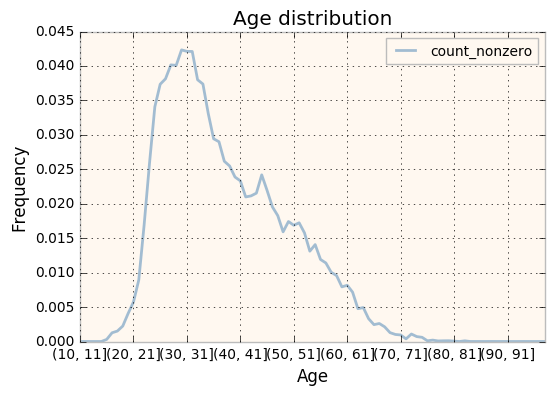

In [14]:
agenorm.plot(alpha=0.5)
pl.title("Age distribution")
pl.ylabel("Frequency")
pl.xlabel("Age")

### Figure 1: Histogrammed distribution of Riders Age and frequency of riding.

[16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 83.0, 84.0, 85.0, 88.0, 89.0, 90.0, 94.0, 102.0, 105.0, 108.0, 114.0, 115.0, 116.0]


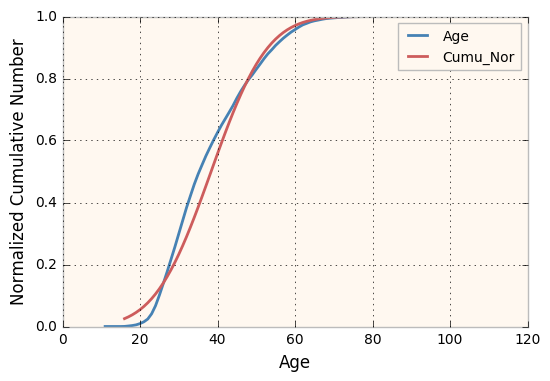

In [17]:
csAge = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).cumsum()

pl.plot( bins[:-1] + 1,csAge / csAge.max(), label = "Age")

xNor = list(set(list(df.age)))[1:]
print (xNor)
yNor= scipy.stats.norm.cdf(xNor,loc=df.age.mean(), scale=df.age.std())


pl.plot(xNor,yNor, label='Cumu_Nor')
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend(loc = 'upper right')

In [18]:
gaussian_mean = df.age.mean()
gaussian_mean

38.351615080342555

In [21]:
gaussian_dev = df.age.std()
gaussian_dev

11.440138639225996

## 1. KS Test
### Null Hypothesis - $H_0$ - Gaussian Distribution fits the Age Distribution of Citibike Drivers with the same mean (38.35) and the same standard deviation (11.44).
### My Significance Level α=0.05 



In [22]:
scipy.stats.kstest(df.age, "norm", args=(gaussian_mean, gaussian_dev))

KstestResult(statistic=0.10663088727174719, pvalue=0.0)

### The p-value is very small. So we can reject the null hypothesis.
### Hence, the Gaussian Distribution does not fit the Age distribution of Citibike drivers

## 2. AD Test
### Null Hypothesis - $H_0$ - The age distribution of Citibike riders is drawn from Normal Distribution

In [24]:
scipy.stats.anderson(df.age, "norm")

AndersonResult(statistic=13805.856181447394, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### Normality is rejected if the critical_values exceeds 0.559, 0.631, 0.754, 0.884 or 1.047 at 15%, 10%, 5%, 2.5%, 1% significance levels. 

#### Refer link for AD Test Critical Values table - https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test

### With above observations, the Null Hypothesis ($H_0$) is rejected.
### The age distribution of Citibike riders is not drawn from Normal Distribution.

# Second Hypothesis Distribution - Exponential

## 3. KS Test
### Null Hypothesis - $H_0$ - Exponential Distribution fits the Age Distribution of Citibike Drivers
### My Significance Level α=0.05

In [25]:
scipy.stats.kstest(df.age, "expon", args=(gaussian_mean, gaussian_dev))

KstestResult(statistic=0.57596118902785898, pvalue=0.0)

### The p-value is very small. So we can reject the null hypothesis.
### Hence, the Exponential Distribution does not fit the Age distribution of Citibike drivers

## 2. AD Test
### Null Hypothesis - $H_0$ - The age distribution of Citibike riders is drawn from Exponential Distribution

In [26]:
scipy.stats.anderson(df.age, "expon")

AndersonResult(statistic=211869.99143883656, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

### Normality is rejected if the critical_values exceeds 0.559, 0.631, 0.754, 0.884 or 1.047 at 15%, 10%, 5%, 2.5%, 1% significance levels. 

### With above observations, the Null Hypothesis ($H_0$) is rejected.
### The age distribution of Citibike riders is not drawn from Exponential Distribution.